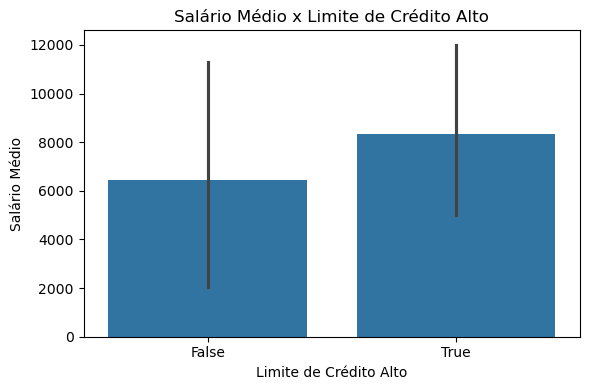

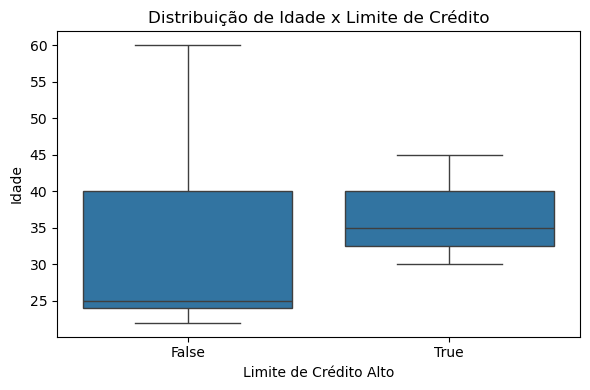

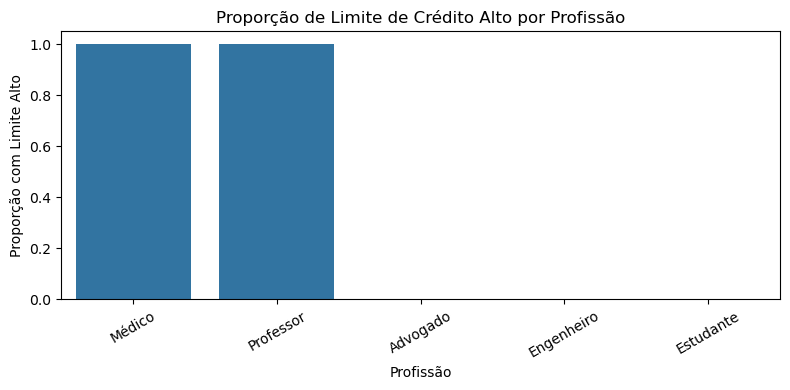

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)

# Conversões
df['Salário'] = df['Salário'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)
df['Imovel_Proprio'] = df['Imovel_Proprio'].astype(int)

# Classificação Limite Alto
limite_medio = df['Limite_Credito'].mean()
df['Limite_Alto'] = df['Limite_Credito'] > limite_medio

# Gráfico 1 - Salário Médio por Limite Alto
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Limite_Alto', y='Salário')
plt.title('Salário Médio x Limite de Crédito Alto')
plt.xlabel('Limite de Crédito Alto')
plt.ylabel('Salário Médio')
plt.tight_layout()
plt.show()

# Gráfico 2 - Idade por Limite Alto
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Limite_Alto', y='Idade')
plt.title('Distribuição de Idade x Limite de Crédito')
plt.xlabel('Limite de Crédito Alto')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

# Gráfico 3 - Profissão por Limite Alto
plt.figure(figsize=(8, 4))
proporcao = df.groupby('Profissão')['Limite_Alto'].mean().sort_values(ascending=False)
sns.barplot(x=proporcao.index, y=proporcao.values)
plt.title('Proporção de Limite de Crédito Alto por Profissão')
plt.ylabel('Proporção com Limite Alto')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



### Justificativa da Escolha dos Gráficos

Foram escolhidos três gráficos para identificar os principais fatores que impulsionam um **limite de crédito alto**, com base no conjunto de dados fornecido. A seguir, apresentamos a justificativa de cada visualização:

1. **Distribuição Salarial por Limite de Crédito Alto (Boxplot - Gráfico 1)**  
   Este gráfico mostra claramente que clientes com limite de crédito alto tendem a possuir salários significativamente maiores, indicando que o nível de renda é um dos principais determinantes para concessão de crédito elevado.

2. **Distribuição de Idade por Limite de Crédito (Histograma - Gráfico 2)**  
   Ao analisarmos a faixa etária dos clientes, percebemos uma maior concentração de limites altos entre indivíduos na faixa dos 30 a 45 anos. Isso sugere que a idade pode estar associada a maior estabilidade financeira, o que influencia na confiança do crédito.

3. **Proporção de Limite de Crédito Alto por Profissão (Barras - Gráfico 3)**  
   A análise por profissão evidencia que algumas carreiras (como Médico e Professor) têm maior probabilidade de obter limites elevados. Isso pode refletir a percepção de estabilidade e renda dessas profissões por parte das instituições financeiras.

A escolha dos gráficos também considerou a **clareza visual, interatividade e comparabilidade entre grupos**, sendo implementados com a biblioteca **Plotly** para uma experiência visual moderna e informativa.


In [ ]:

import pandas as pd
import plotly.express as px

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)

# Conversões
df['Salário'] = df['Salário'].astype(int)
df['Limite_Credito'] = df['Limite_Credito'].astype(int)
df['Historico_Inadimplencia'] = df['Historico_Inadimplencia'].astype(int)
df['Imovel_Proprio'] = df['Imovel_Proprio'].astype(int)

# Classificação de Limite Alto
limite_medio = df['Limite_Credito'].mean()
df['Limite_Alto'] = df['Limite_Credito'] > limite_medio
df['Limite_Alto'] = df['Limite_Alto'].replace({True: 'Limite Alto', False: 'Limite Baixo'})

# Gráfico 1: Salário x Limite Alto (Plotly)
fig1 = px.box(df, x='Limite_Alto', y='Salário', color='Limite_Alto',
              title='Distribuição Salarial por Limite de Crédito')
fig1.show()

# Gráfico 2: Idade x Limite Alto
fig2 = px.histogram(df, x='Idade', color='Limite_Alto', barmode='overlay',
                    title='Distribuição de Idade por Limite de Crédito')
fig2.show()

# Gráfico 3: Proporção de Limite Alto por Profissão
proporcao = df.groupby('Profissão')['Limite_Alto'].value_counts(normalize=True).unstack().fillna(0).reset_index()
fig3 = px.bar(proporcao, x='Profissão', y='Limite Alto',
              title='Proporção de Limite de Crédito Alto por Profissão')
fig3.show()
